
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Group Partners
# Truett Bloxsom tsb962
# Jake Hill jah8787

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer

During my internship last summer I worked for a Financial Services company that was trying to build an eCommerce business. Another intern and I were tasked with building a dashboard that we could show the CEO with the purpose of monitoring sales performance. We used SQL to gather the data from our database and divvy up the data into views with metrics that we thought would be most useful to the CEO.

The problem was that we were using the wrong tools for data visualization. We had to use SQL Server Reporting Services (SSRS) to create the data visualizations, which is not SSRS's strong suit. (It's great for making tabular pdf reports, however.) It required a lot of time and effort to make even a simple bar graph. Furthermore, our CEO wanted data visualizations to be printed out on paper rather than published online, which negates any interactive functions of our data visualizations and makes it harder to create a useful dashboard. Figuring out how to prepare the report in a paper format took way too long. It would have been more efficient to a better data visualization tool and to publish the dashboard online.
 ᐧ



# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$, which of course is not known to the experimenter. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurrence of the observations. Write the log-likelihood function for the set of observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


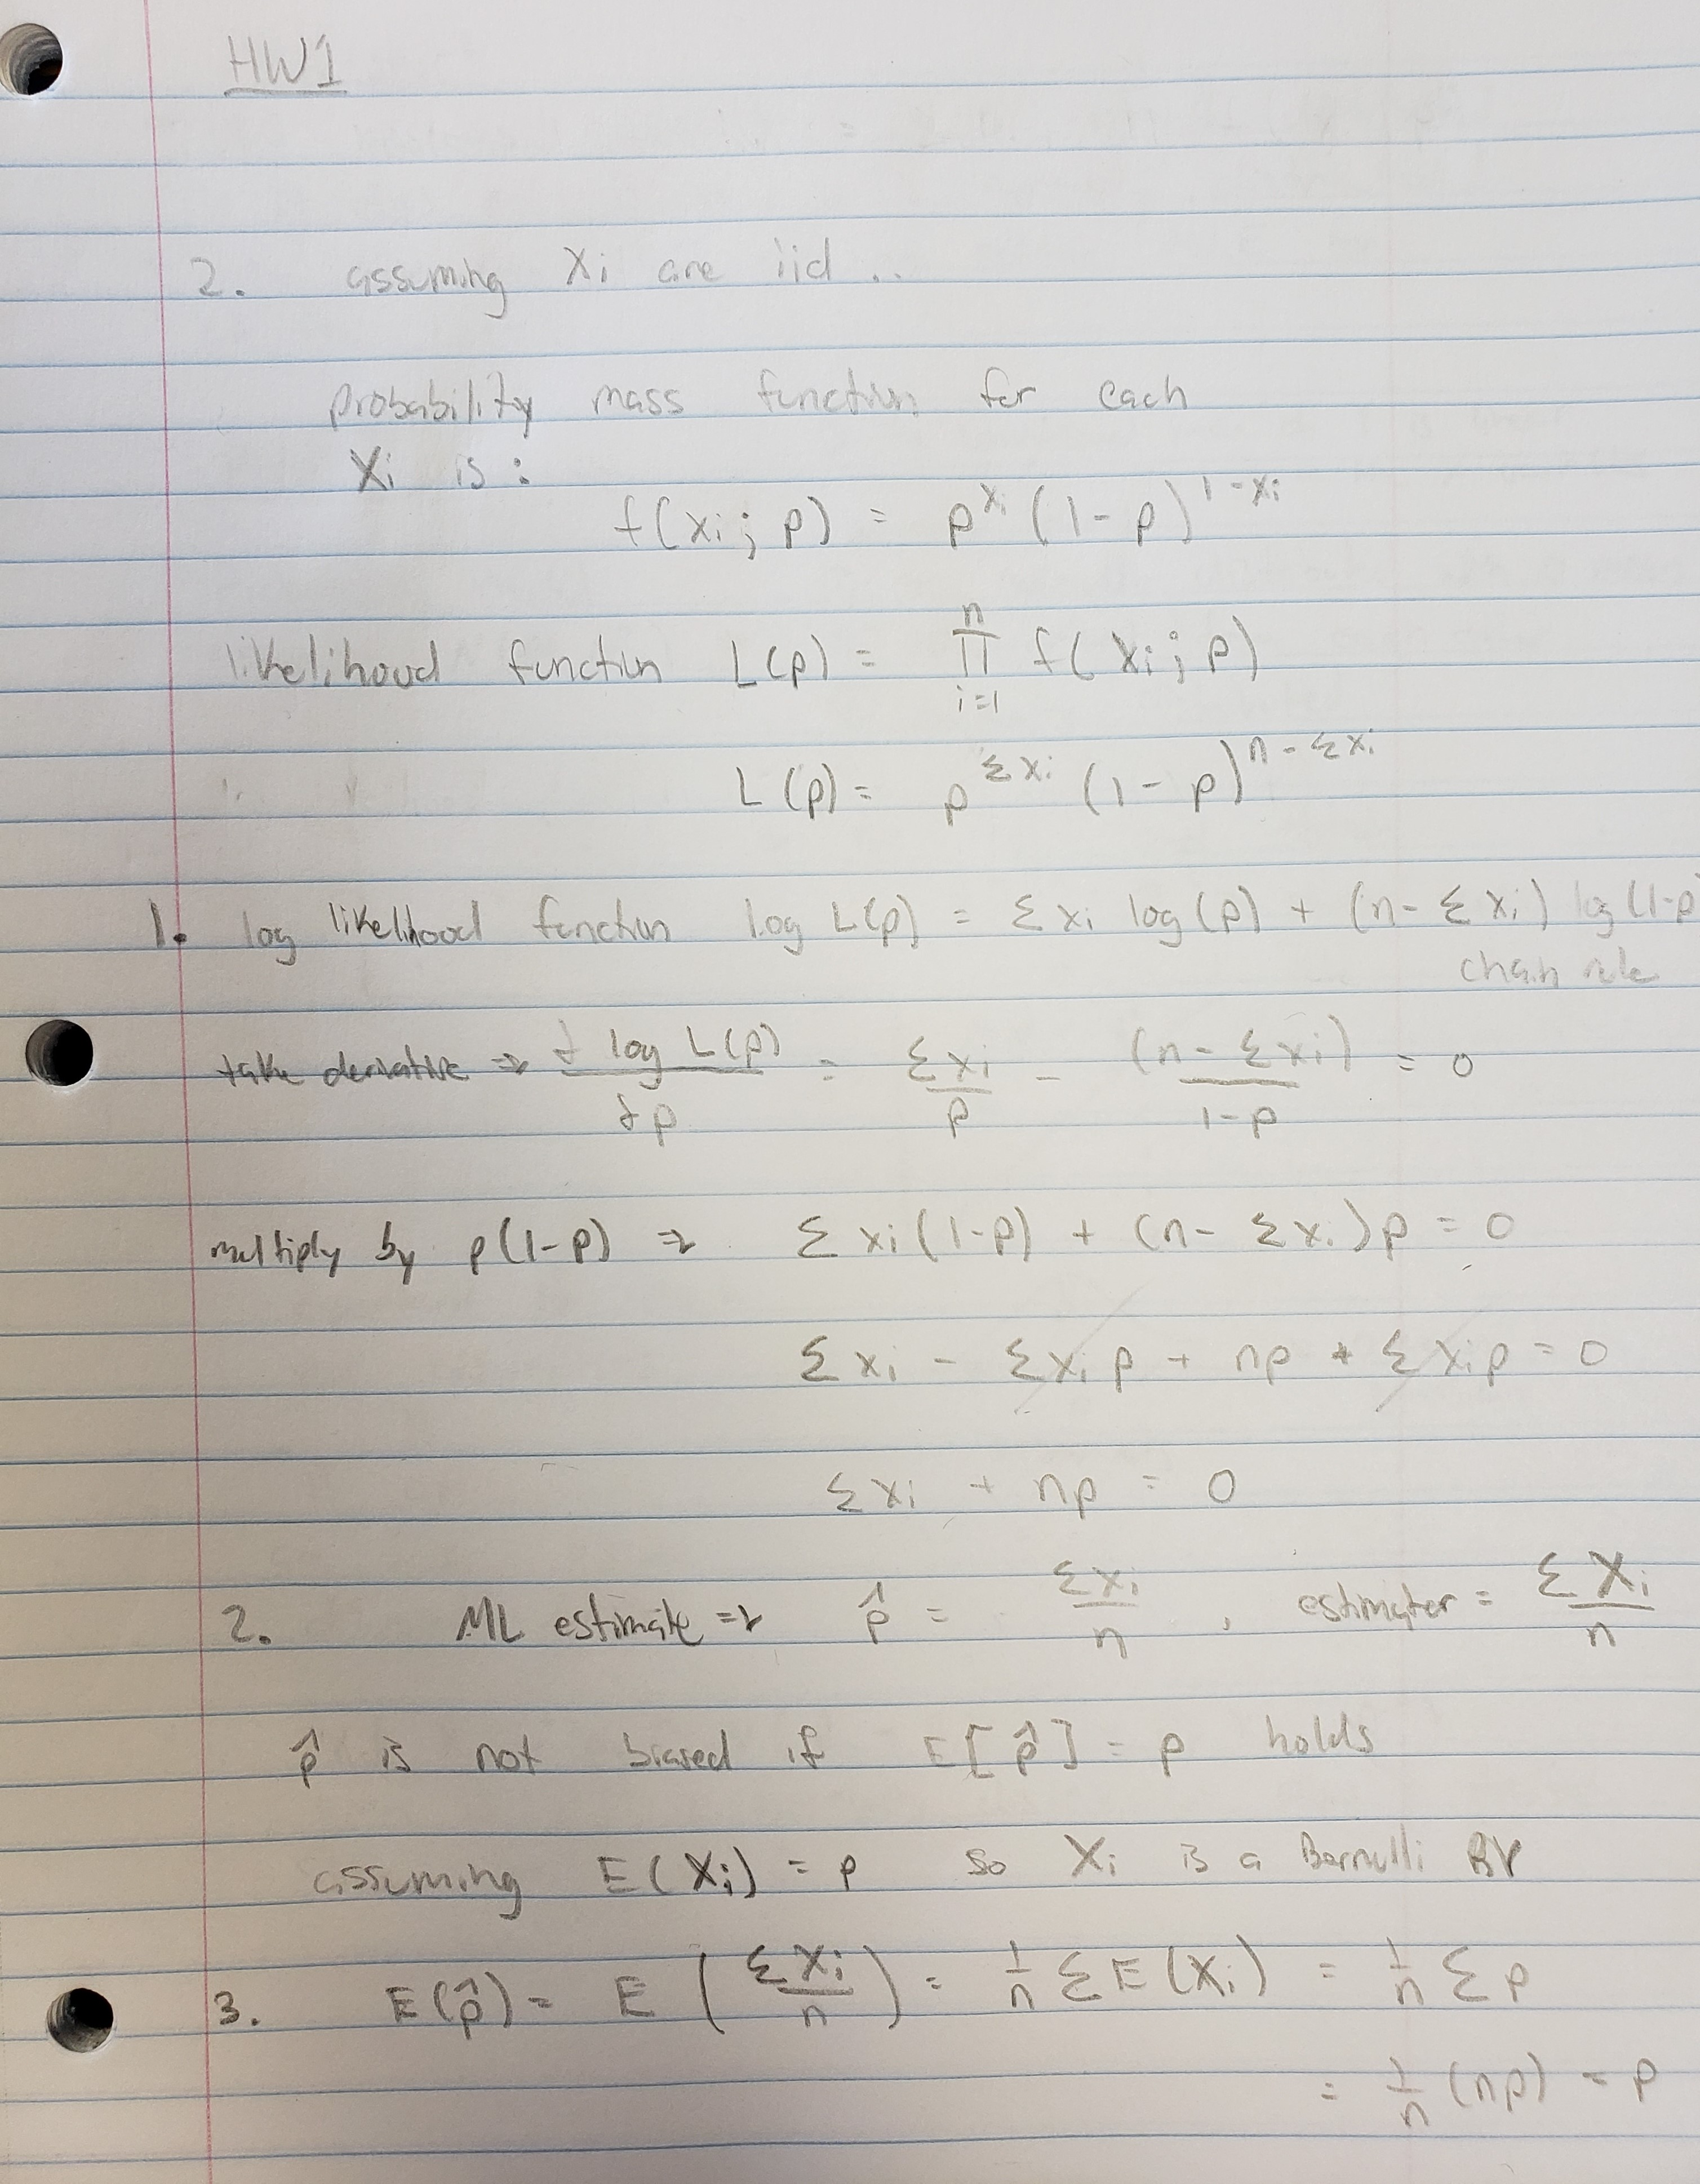

In [1]:
## Answer
from IPython.display import Image

fig = Image(filename=('HW1_Q2C.png'))
fig

# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = total_rooms/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [3]:
print(X.shape)
print(X[:5])

(20433, 8)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462  


## (b)

In [4]:
from sklearn import metrics
reg = linear_model.LinearRegression()
reg.fit(X, Y)
Y_pred = reg.predict(X)
print("MAE =",metrics.mean_absolute_error(Y, Y_pred))
pd.DataFrame(zip(X.columns, reg.coef_), columns = ["Variable", "Coefficients"])

MAE = 50799.6307289529


,Variable,Coefficients
0,longitude,-42730.120454
1,latitude,-42509.736942
2,housing_median_age,1157.900307
3,total_rooms,-8.249725
4,total_bedrooms,113.820707
5,population,-38.385578
6,households,47.701351
7,median_income,40297.521715


## (c)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)
train = reg.fit(X_train, y_train)
Y_pred = reg.predict(X_train)
print("MAE train =", metrics.mean_absolute_error(y_train, Y_pred))
Y_pred = reg.predict(X_test)
print("MAE test =", metrics.mean_absolute_error(y_test, Y_pred))

MAE train = 50749.10314465295
MAE test = 50916.74299435109


## (d)

In [6]:
df = X_train.corr()
mask = df["households"] > 0.9
print(df[mask].index)

Index(['total_rooms', 'total_bedrooms', 'population', 'households'], dtype='object')


Independent variables having correlation greater than 0.9 w.r.t 'households': 



## (e)

In [7]:
# For calculating average population, I divided population by households instead of total rooms by households since that makes more sense
X_train["average_bedrooms"] = X_train["total_bedrooms"] / X_train["households"]
X_train["average_rooms"] = X_train["total_rooms"] / X_train["households"]
X_train["average_population"] = X_train["population"] / X_train["households"]

X_test["average_bedrooms"] = X_test["total_bedrooms"] / X_test["households"]
X_test["average_rooms"] = X_test["total_rooms"] / X_test["households"]
X_test["average_population"] = X_test["population"] / X_test["households"]

df_corr = X_train.corr()
df_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,average_bedrooms,average_rooms,average_population
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466,0.017548,-0.027099,0.011811
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943,0.062059,0.104294,-0.002330
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736,-0.077163,-0.158539,0.012569
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486,0.036170,0.146227,-0.031031
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082,0.054525,0.004237,-0.036556
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523,-0.062026,-0.072951,0.077684
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033,-0.050050,-0.081950,-0.034892
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000,-0.059447,0.350785,0.000417
average_bedrooms,0.017548,0.062059,-0.077163,0.036170,0.054525,-0.062026,-0.050050,-0.059447,1.000000,0.833841,-0.002194
average_rooms,-0.027099,0.104294,-0.158539,0.146227,0.004237,-0.072951,-0.081950,0.350785,0.833841,1.000000,0.003475


In [8]:
df_corr = X_test.corr()
df_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,average_bedrooms,average_rooms,average_population
longitude,1.000000,-0.922309,-0.104586,0.051143,0.070192,0.097593,0.057302,-0.003785,0.004233,-0.028197,-0.006880
latitude,-0.922309,1.000000,0.008929,-0.042026,-0.068183,-0.107894,-0.074459,-0.090900,0.087398,0.111554,0.007836
housing_median_age,-0.104586,0.008929,1.000000,-0.369745,-0.328996,-0.298934,-0.311891,-0.124359,-0.079077,-0.142633,0.016566
total_rooms,0.051143,-0.042026,-0.369745,1.000000,0.936335,0.853344,0.924022,0.197219,0.015158,0.109662,-0.022259
total_bedrooms,0.070192,-0.068183,-0.328996,0.936335,1.000000,0.871497,0.980114,0.004301,0.028014,-0.003854,-0.024878
population,0.097593,-0.107894,-0.298934,0.853344,0.871497,1.000000,0.901150,0.019771,-0.075634,-0.070284,0.072641
households,0.057302,-0.074459,-0.311891,0.924022,0.980114,0.901150,1.000000,0.025730,-0.065892,-0.077382,-0.024337
median_income,-0.003785,-0.090900,-0.124359,0.197219,0.004301,0.019771,0.025730,1.000000,-0.069146,0.276654,0.041998
average_bedrooms,0.004233,0.087398,-0.079077,0.015158,0.028014,-0.075634,-0.065892,-0.069146,1.000000,0.878158,-0.010940
average_rooms,-0.028197,0.111554,-0.142633,0.109662,-0.003854,-0.070284,-0.077382,0.276654,0.878158,1.000000,-0.012732


Observation: the average variables seem to be uncorrelated with all the other variables except average_bedrooms is highly positively correlated with average_rooms which makes sense. 

## (f)

In [9]:
train = reg.fit(X_train, y_train)
Y_pred = reg.predict(X_train)
print("MAE train =", metrics.mean_absolute_error(y_train, Y_pred))
Y_pred = reg.predict(X_test)
print("MAE test =", metrics.mean_absolute_error(y_test, Y_pred))

MAE train = 50474.268791457886
MAE test = 50783.974603927876


# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the dependent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn import preprocessing
import numpy as np

X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

In [11]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas =  10**np.linspace(10,-2,100)*0.5

lasso = Lasso(random_state=11, max_iter=10000)

tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(lasso, tuned_parameters, scoring = "neg_mean_absolute_error", cv = 5, refit = False)
clf.fit(X_scaled_train, y_train)
print("LASSO =",clf.best_params_)

LASSO = {'alpha': 0.005}


In [12]:
ridge = Ridge(random_state=11, max_iter=10000)

tuned_parameters = [{'alpha': alphas}]

clf = GridSearchCV(ridge, tuned_parameters, scoring = "neg_mean_absolute_error", cv = 5, refit = False)
clf.fit(X_scaled_train, y_train)
print("Ridge =",clf.best_params_)

Ridge = {'alpha': 37.823166377731454}


## 2

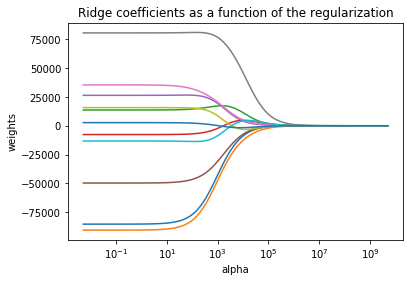

When the value of the regularization parameter (alpha) increases, I see the coefficents trending towards zero. Each coefficent trends towards zero at different rates.


In [22]:
#Plotting ridge coefficents as a function of the regularization
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X_scaled_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()
print("When the value of the regularization parameter (alpha) increases, I see the coefficents trending towards zero. \
Each coefficent trends towards zero at different rates.")

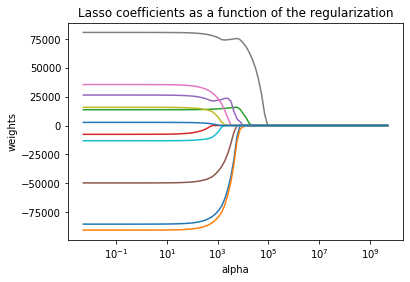

Unlike Ridge which pushes coefficients towards zero, Ridge does not eliminate variables. As LASSO pushes coefficents towards zero, LASSO can push the coefficients towards zero. Comparing the graphs, LASSO tends to push coeffients towrds zero faster than Ridge.


In [23]:
#Plotting lasso coefficents as a function of the regularization
coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha = a, fit_intercept = False)
    lasso.fit(X_scaled_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

print("Unlike Ridge which pushes coefficients towards zero, Ridge does not eliminate variables. As LASSO pushes coefficents towards \
zero, LASSO can push the coefficients towards zero. Comparing the graphs, LASSO tends to push coeffients towrds zero faster than Ridge.")

## 3

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_scaled_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = lin_reg.predict(X_scaled_test)
print("OLS test MAE =",metrics.mean_absolute_error(y_test, y_pred))

OLS test MAE = 50682.397574551534


In [17]:
ridge_reg = Ridge(alpha = 37.823166377731454, solver = "cholesky", random_state = 11)
ridge_reg.fit(X_scaled_train, y_train)
y_pred = ridge_reg.predict(X_scaled_test)
print("ridge test MAE =",metrics.mean_absolute_error(y_test, y_pred))

ridge test MAE = 50635.1150325643


In [18]:
lasso = Lasso(alpha = 0.005, random_state = 11)
lasso.fit(X_scaled_train, y_train)
y_pred = lasso.predict(X_scaled_test)
print("LASSO test MAE =",metrics.mean_absolute_error(y_test, y_pred))

LASSO test MAE 50682.39724675481


## 4

In [19]:
#Fitting LassoCV
lassoCV_reg = linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
lassoCV_reg.fit(X_scaled_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [20]:
#Print the alpha parameter obtained above
print("LASSO =",lassoCV_reg.alpha_)

LASSO = 161.80167643776653


In [21]:
#Fit lasso using the above alpha and report MAE on Test.
lasso = Lasso(alpha = 161.80167643776653, random_state = 11)
lasso.fit(X_scaled_train, y_train)
y_pred = lasso.predict(X_scaled_test)
print(metrics.mean_absolute_error(y_test, y_pred))
pd.DataFrame(zip(X_test.columns, lasso.coef_), columns = ["Variable", "Coefficients"])

50681.95000148011


,Variable,Coefficients
0,longitude,-83729.407887
1,latitude,-88966.607782
2,housing_median_age,13793.246559
3,total_rooms,-5441.523596
4,total_bedrooms,24891.298878
5,population,-48359.516632
6,households,33593.700676
7,median_income,79916.038284
8,average_bedrooms,14815.920677
9,average_rooms,-12517.528497


## 5

## Answer
Since our variables have different units and magnitudes, and our models use Eucledian distance between data points, our model would put more weight on variables with large magnitudes and neglect the units. By scaling the data, we put all variables on the same level of magnitude. 

# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

## Answer
The variance of your model will decrease as you add more data to your training set. Adding data decreases your chances of overfitting your data or following the noise. Adding relevant data helps the model find the true signal. If you decrease the number of examples your chances of overfitting increases. 